# Feature Layer properties

Hosted Feature services, also called hosted feature layers, can contain one or more feature layers with spatial information, or one or more tables that do not have spatial information. They also contain many properties that inform client applications about their state, version, capabilities, extent, allowed operations and much more. Together these properties make up a service or layer `definition`. Refer to the [feature service](/rest/services-reference/enterprise/feature-service/) page to learn about these types of services in detail. This guide outlines how you can query and update feature service properties using the item sourced by this feature service.

> **NOTE:** You must be the item owner, an organization administrator, or an user assigned a role with the appropriate privileges to run the `update_definition()` method used in this guide.

## Connect to a Web GIS and retrieve a Feature Layer item

In [20]:
# connect to your GIS with publisher or higher privileges
from arcgis.gis import GIS
gis = GIS(profile='layer_owner')

<Item title:"Ports along the US West Coast" type:Feature Layer Collection owner:api_data_owner>
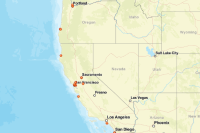

In [21]:
search_result= gis.content.search("Ports along west coast", "Feature Layer")
ports_item = search_result[0]
ports_item

## The feature service definition
Once you have a `Feature Layer` item, you can access the definition of the feature service that sources the item.  First, import the [`FeatureLayerCollection`](/python/api-reference/arcgis.features.toc.html#featurelayercollection) class. This class contains a method called [`fromitem()`](/python/latest/api-reference/arcgis.features.toc.html#arcgis.features.FeatureLayerCollection.fromitem), which returns an instance of a `FeatureLayerCollection` object. 

In [10]:
from arcgis.features import FeatureLayerCollection
ports_flc = FeatureLayerCollection.fromitem(ports_item)

Querying the `properties` property on this `FeatureLayerCollection` object returns a dictionary of all the feature service properties. Let's inspect if the `description` or `copyright` attributes of the service have been entered.

In [11]:
ports_flc.properties

{
  "currentVersion": 11.1,
  "serviceItemId": "e0dae2efe40a414a9700bee3a35c846b",
  "serviceDescription": "",
  "hasVersionedData": false,
  "supportsDisconnectedEditing": false,
  "hasStaticData": false,
  "hasSharedDomains": false,
  "maxRecordCount": 1000,
  "supportedQueryFormats": "JSON",
  "supportsVCSProjection": false,
  "supportedExportFormats": "csv,shapefile,sqlite,geoPackage,filegdb,featureCollection,geojson,excel",
  "capabilities": "Create,Delete,Query,Update,Editing,Sync",
  "description": "",
  "copyrightText": "",
  "spatialReference": {
    "wkid": 102100,
    "latestWkid": 3857
  },
  "initialExtent": {
    "xmin": -17764735.368653413,
    "ymin": 2241467.1730974796,
    "xmax": -13044788.959018612,
    "ymax": 5721784.0173567245,
    "spatialReference": {
      "wkid": 102100,
      "latestWkid": 3857
    }
  },
  "fullExtent": {
    "xmin": -17764735.368653413,
    "ymin": 2241467.1730974796,
    "xmax": -13044788.959018612,
    "ymax": 5721784.0173567245,
    "sp

Both properties are empty. Let's update them as an example of how to update feature service properties

## Update the feature service definition

The [`manager`](/python/api-reference/arcgis.features.toc.html#arcgis.features.FeatureLayerCollection.manager) property accesses the [`FeatureLayerCollectionManager`](/python/api-reference/arcgis.features.managers.html#featurelayercollectionmanager) class. Use the [`update_definition()`](/python/api-reference/arcgis.features.toc.html#arcgis.features.FeatureLayerCollection.update_definition) method and pass in a dictionary of the properties you want to edit to update the definition of the hosted feature service.

### Updating feature service properties

In [12]:
update_dict = {'description':'Updated using ArcGIS Python API',
              'copyrightText':'copyright Python API guide'}
ports_flc.manager.update_definition(update_dict)

{'success': True}

Let us access the service definition once again to see if these fields are updated

In [13]:
ports_flc.properties.description

'Updated using ArcGIS Python API'

In [14]:
ports_flc.properties.copyrightText

'copyright Python API guide'

### Updating feature service capabilities

Let's edit the `capabilities` property to disable `editing` and `sync`

In [15]:
update_dict2 = {"capabilities": "Query",
               "syncEnabled": False}
ports_flc.manager.update_definition(update_dict2)

{'success': True}

In [16]:
ports_flc.properties.capabilities

'Query'

In [17]:
ports_flc.properties.syncEnabled

False

In [18]:
"syncCapabilities" in ports_flc.properties

False

Turning off `syncEnabled` automatically removes `syncCapabilities`.